# Kaggle Configuration

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c cs-480-2024-spring

 97% 279M/287M [00:04<00:00, 28.5MB/s]
100% 287M/287M [00:04<00:00, 60.2MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('cs-480-2024-spring.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
import os

train_image_dir = '/content/data/train_images'
test_image_dir = '/content/data/test_images'

os.listdir('/content/data/')

['train_images',
 'sample_submission.csv',
 'target_name_meta.tsv',
 'test_images',
 'train.csv',
 'test.csv']

# Data Preprocessing

In [ ]:
import pandas as pd

# Load CSV files
train_df = pd.read_csv('/content/data/train.csv')
test_df = pd.read_csv('/content/data/test.csv')

print(train_df.shape)
print(test_df.shape)

(43363, 170)
(6391, 164)


In [ ]:
train_df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,101801795,21.478968,772.404785,110.047623,56.210766,161.457764,13.886666,129,141,134,...,0.448959,0.419139,0.404626,0.403707,1.035657,142.521015,19699.923668,3465.054691,15.842202,399384.490146
1,115813315,26.927639,1456.733276,329.366669,109.906487,178.745422,19.846668,139,140,140,...,0.362919,0.368997,0.391109,0.407680,0.980728,153.726248,19699.721088,3462.940457,14.456965,398961.220402
2,173551949,27.336945,992.366638,248.166672,115.545128,292.781219,23.486668,144,143,148,...,0.285225,0.289911,0.337495,0.393714,1.373851,137.016532,19702.276217,3459.473270,15.833161,397614.158049
3,148811120,25.558649,2246.017822,329.342224,56.563957,211.065521,16.768000,116,132,122,...,0.572420,0.566320,0.556564,0.512105,0.790627,162.022021,19702.424188,3480.277051,14.684226,402414.611731
4,195108876,25.204723,2309.776123,284.576202,39.409706,36.499138,10.257143,100,113,105,...,0.634200,0.628594,0.644814,0.654979,1.004912,154.428170,19701.160757,3487.689253,15.023368,404405.289639


In [ ]:
test_df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
0,154220505,26.591249,2279.300049,146.199997,22.313732,44.629532,7.960001,114,125,117,...,0.287167,0.287904,0.281897,0.282957,0.285863,0.286542,0.284718,0.287036,0.292942,0.292871
1,195736552,22.575659,1640.576538,304.744904,82.645508,456.922668,19.664286,137,157,148,...,0.249367,0.282085,0.302374,0.291980,0.263740,0.256895,0.288942,0.283586,0.276328,0.270898
2,182701773,1.646429,762.785706,62.035713,35.019753,628.131958,26.042858,108,138,121,...,0.360080,0.355498,0.375334,0.404420,0.420305,0.410467,0.381971,0.402281,0.361373,0.355861
3,27688500,18.799629,41.582222,3.986667,30.636101,266.586731,20.665779,131,146,134,...,0.127384,0.129487,0.134308,0.137946,0.138145,0.136799,0.135013,0.127216,0.120512,0.120655
4,195825045,7.098363,519.127563,29.540817,20.231646,1060.959473,37.541325,110,145,129,...,0.274399,0.327220,0.374367,0.442450,0.455588,0.438150,0.390645,0.361673,0.360657,0.326193


## Use z-score normalization

In [ ]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
target_scaler = StandardScaler(with_mean=True, with_std=True)

### Targets

In [ ]:
target_columns = train_df.columns[-6:]
target_scaler = target_scaler.fit(train_df[target_columns])
train_df[target_columns] = target_scaler.transform(train_df[target_columns])
print(train_df[target_columns])

        X4_mean  X11_mean  X18_mean  X26_mean  X50_mean  X3112_mean
0     -0.004253 -0.837939 -0.399356 -0.251231  1.230857    0.117028
1     -0.404230  0.781923 -0.446354 -0.282741 -1.104366   -0.070679
2      2.458398 -1.633683  0.146432 -0.334415  1.215616   -0.668061
3     -1.788507  1.981184  0.180761 -0.024364 -0.721251    1.460797
4     -0.228131  0.883394 -0.112353  0.086105 -0.149527    2.343603
...         ...       ...       ...       ...       ...         ...
43358 -0.028935 -0.054298 -0.536413 -0.335319 -1.413183   -0.380761
43359  1.613402 -0.740473  3.400817  0.998535  0.052628    1.439075
43360 -1.006843  0.717028 -0.553435 -0.334176 -0.358080   -0.566529
43361 -0.748489  0.710065 -0.563143 -0.334894 -0.475129   -0.646288
43362 -1.377732  0.150666 -0.489573 -0.275587 -0.542671   -0.397762

[43363 rows x 6 columns]


### Features

In [ ]:
feature_columns = train_df.columns[1:164]
print('Before Standard Scaler: ', train_df[feature_columns])
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
print('After Standard Scaler: ', train_df[feature_columns])

Before Standard Scaler:         WORLDCLIM_BIO1_annual_mean_temperature  \
0                                   21.478968   
1                                   26.927639   
2                                   27.336945   
3                                   25.558649   
4                                   25.204723   
...                                       ...   
43358                               25.551382   
43359                               24.163185   
43360                               23.165426   
43361                               15.147365   
43362                                4.789425   

       WORLDCLIM_BIO12_annual_precipitation  \
0                                772.404785   
1                               1456.733276   
2                                992.366638   
3                               2246.017822   
4                               2309.776123   
...                                     ...   
43358                           3294.408203   
43359     

In [ ]:
test_feature_columns = test_df.columns[1:164]
print('Before Standard Scaler: ', test_df[test_feature_columns])
test_df[test_feature_columns] = scaler.fit_transform(test_df[test_feature_columns])
print('After Standard Scaler: ', test_df[test_feature_columns])

Before Standard Scaler:        WORLDCLIM_BIO1_annual_mean_temperature  \
0                                  26.591249   
1                                  22.575659   
2                                   1.646429   
3                                  18.799629   
4                                   7.098363   
...                                      ...   
6386                               10.461925   
6387                               11.048512   
6388                               22.387798   
6389                               22.683929   
6390                               12.740625   

      WORLDCLIM_BIO12_annual_precipitation  \
0                              2279.300049   
1                              1640.576538   
2                               762.785706   
3                                41.582222   
4                               519.127563   
...                                    ...   
6386                           1271.400024   
6387                          

## Add image paths

In [ ]:
# train data
train_id = train_df[['id']].copy()
train_id['id'] = train_df['id'].astype(str) + '.jpeg'
train_id['image_path'] = train_image_dir + '/' + train_id['id']
train_id.head()

# test data
test_id = test_df[['id']].copy()
test_id['id'] = test_df['id'].astype(str) + '.jpeg'
test_id['image_path'] = test_image_dir + '/' + test_id['id']

## Split into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df.iloc[:, 1:164]
y = train_df.iloc[:, -6:]

X_train, X_val, y_train, y_val, train_image_paths, val_image_paths = train_test_split(
    X, y, train_id['image_path'], test_size=0.2, random_state=42
)

test = test_df.iloc[:, 1:164]

## Data loaders

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np

In [ ]:
class PlantTraitDataset(Dataset):
    def __init__(self, image_paths, ancillary_data, traits=None, transform=None):
        self.image_paths = image_paths
        self.ancillary_data = ancillary_data
        self.traits = traits
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths.iloc[idx]).convert('RGB')

        if self.transform:
            image = self.transform(image)

        ancillary = torch.tensor(self.ancillary_data.iloc[idx].values, dtype=torch.float32)

        if self.traits is not None:
            traits = torch.tensor(self.traits.iloc[idx].values, dtype=torch.float32)
            return image, ancillary, traits
        else:
            return image, ancillary

In [ ]:
from torchvision.models import ResNet50_Weights

In [ ]:
weights = ResNet50_Weights.IMAGENET1K_V2

In [ ]:
transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
        weights.transforms()
        ])

basic_test_transform = transforms.Compose([
    weights.transforms()
])

In [ ]:
# Create datasets
train_dataset = PlantTraitDataset(train_image_paths, X_train, y_train, transform=transform)
val_dataset = PlantTraitDataset(val_image_paths, X_val, y_val, transform=basic_test_transform)
test_dataset = PlantTraitDataset(test_id['image_path'], test, transform=basic_test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20)

test_loader = DataLoader(test_dataset, batch_size=20)

## Model

In [ ]:
class PlantTraitCNN(nn.Module):
    def __init__(self, num_traits=6):
        super(PlantTraitCNN, self).__init__()
        self.cnn = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        num_ftrs = self.cnn.fc.in_features  # This should be 2048 for ResNet50
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])  # Remove the last two layers (avg pool and fc)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.cnn_regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Linear(512, 4)
        )

        self.ancillary_network = nn.Sequential(
            nn.Linear(163, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 4)
        )

        self.final_regressor = nn.Linear(num_traits * 2, num_traits)

        self.final_regressor = nn.Sequential(
            nn.Linear(8,8),
            nn.ReLU(),
            nn.Linear(8,8),
            nn.ReLU(),
            nn.Linear(8,6),
            nn.ReLU(),
            nn.Linear(6,num_traits)
        )

    def forward(self, image, ancillary):
        img_features = self.cnn(image)
        img_features = self.global_avg_pool(img_features)
        cnn_output = self.cnn_regressor(img_features)

        anc_features = self.ancillary_network(ancillary)

        combined = torch.cat((cnn_output, anc_features), dim=1)
        final_output = self.final_regressor(combined)

        return final_output

## Train

In [ ]:
# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)

#     train_loss_history = []
#     val_loss_history = []

#     for epoch in range(num_epochs):
#         model.train()
#         train_loss = 0.0

#         for images, ancillary, traits in train_loader:
#             images, ancillary, traits = images.to(device), ancillary.to(device), traits.to(device)

#             optimizer.zero_grad()
#             outputs = model(images, ancillary)
#             loss = criterion(outputs, traits)
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()

#         # Validation
#         model.eval()
#         val_loss = 0.0
#         with torch.no_grad():
#             for images, ancillary, traits in val_loader:
#                 images, ancillary, traits = images.to(device), ancillary.to(device), traits.to(device)
#                 outputs = model(images, ancillary)
#                 loss = criterion(outputs, traits)
#                 val_loss += loss.item()

#         train_loss_history.append(train_loss/len(train_loader))
#         val_loss_history.append(val_loss/len(val_loader))
#         print(f"Epoch {epoch+1}/{num_epochs}")
#         print(f"Train Loss: {train_loss/len(train_loader):.4f}")
#         print(f"Val Loss: {val_loss/len(val_loader):.4f}")
#         print("-" * 10)

#     return train_loss_history, val_loss_history

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, fine_tune_epoch=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        if epoch == fine_tune_epoch:
            # Set fine_tune to True and unfreeze the ResNet50 layers
            model.fine_tune = True
            for param in model.cnn.parameters():
                param.requires_grad = True

            # Reinitialize the optimizer to include the unfrozen ResNet50 parameters
            optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-2)

        model.train()
        train_loss = 0.0

        for images, ancillary, traits in train_loader:
            images, ancillary, traits = images.to(device), ancillary.to(device), traits.to(device)

            optimizer.zero_grad()
            outputs = model(images, ancillary)
            loss = criterion(outputs, traits)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, ancillary, traits in val_loader:
                images, ancillary, traits = images.to(device), ancillary.to(device), traits.to(device)
                outputs = model(images, ancillary)
                loss = criterion(outputs, traits)
                val_loss += loss.item()

        train_loss_history.append(train_loss/len(train_loader))
        val_loss_history.append(val_loss/len(val_loader))
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss/len(train_loader):.4f}")
        print(f"Val Loss: {val_loss/len(val_loader):.4f}")
        print("-" * 10)

    return train_loss_history, val_loss_history

In [ ]:
model = PlantTraitCNN()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, betas=(0.9, 0.999), weight_decay=1e-2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]


In [ ]:
# Train the model
train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=8)

# Save the trained model
torch.save(model.state_dict(), 'plant_trait_model.pth')

Epoch 1/8
Train Loss: 0.9278
Val Loss: 0.8554
----------
Epoch 2/8
Train Loss: 0.8439
Val Loss: 0.8311
----------
Epoch 3/8
Train Loss: 0.8096
Val Loss: 0.8042
----------
Epoch 4/8
Train Loss: 0.7685
Val Loss: 0.7700
----------
Epoch 5/8
Train Loss: 0.7395
Val Loss: 0.7643
----------
Epoch 6/8
Train Loss: 0.6895
Val Loss: 0.7713
----------
Epoch 7/8
Train Loss: 0.6681
Val Loss: 0.7708
----------
Epoch 8/8
Train Loss: 0.6543
Val Loss: 0.7707
----------


In [ ]:
import matplotlib.pyplot as plt

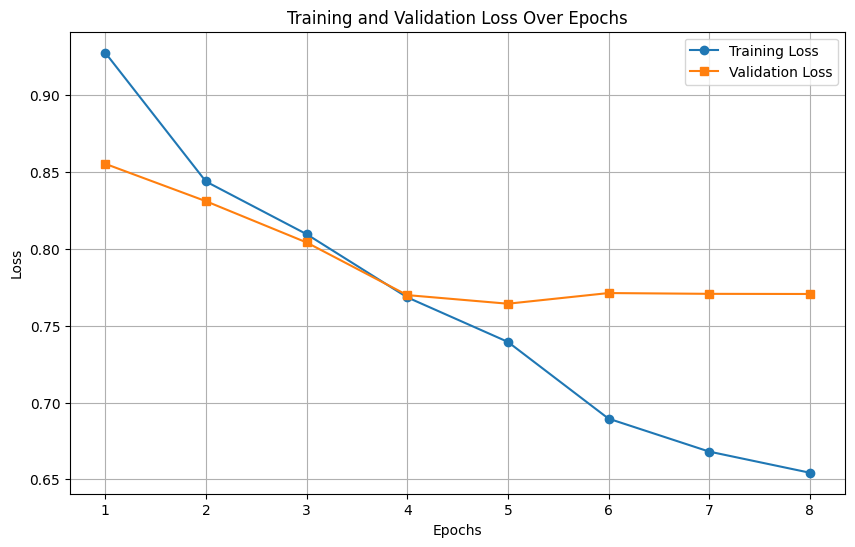

In [ ]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_loss_history) + 1)
plt.plot(epochs, train_loss_history, label='Training Loss', marker='o')
plt.plot(epochs, val_loss_history, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions

In [ ]:
def predict(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    predictions = []
    with torch.no_grad():
        for images, ancillary in test_loader:
            images, ancillary = images.to(device), ancillary.to(device)
            outputs = model(images, ancillary)
            predictions.extend(outputs.cpu().numpy())

    return predictions

In [ ]:
normalized_predictions = predict(model, test_loader)

In [ ]:
predictions = target_scaler.inverse_transform(normalized_predictions)

# Download CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_download_path = '/content/drive/My Drive/Colab Notebooks/CS 480/Project/20948155_brebeanu.csv' # replace with your path
labels = ['X4', 'X11', 'X18', 'X26', 'X50', 'X3112']
submission_df = pd.DataFrame(predictions, columns=labels)
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'X4', 'X11', 'X18', 'X26', 'X50', 'X3112']]
submission_df.to_csv(csv_download_path, index=False)